<a href="https://colab.research.google.com/github/ShivangiRastogi1/Starbucks_offer_Analysis-Machine_Learning_EDA/blob/main/Starbucks_Offer_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Starbucks Customers Behavior Analysis


## Project Overview:

Maintaining customer satisfaction is a particular element Starbucks does excellently. As competition rises, though, it will be interesting to see if this is just a sociological phenomenon or if Starbucks actually values its customers' patronage. In this project, I'll describe how I use experimental data provided by Starbuck which contains simulated data that mimics customer behavior on the Starbucks rewards mobile app and it is based on customer's past purchases to identify the groups and deals that individuals are most interested in. Starbucks delivers offers to customers who use its mobile app every few days. An offer might BOGO (buy one, get one free) or it might be free drinks deal. To identify which group responds favorably to which offers, I have utilized this dataset to examine transactions, demographics, and the offer portfolio.

## Problem Statement:

Analyzing client behavior and interactions with promotional offers provided via the app is the aim of this project. I am trying to find a reliable technique to link customers' offer selections with their demographic data by first understanding the types of people they are. The project's goal is to determine the most profitable offer based on the customer's demographics.

* I will first investigate customers demographics and transcript data.
* Then I will combine the offer portfolio, customer profile, and transaction data. One DataFrame will be generated representing the total amount of transaction with an offer's attributes and customer demographic data. Data visulisation will be performed on the data.
* Clustering was used to help group the members based on their purchasing behavior, which should further our understanding. Further, combined data will be split into training and testing sets. Regression will be used to predict the transaction amount based on demographic.
* I will assess Sum of Squares (SSE) which calculates the sum of the squared differences between each observation and its group's mean. It can be used as a measure of variation within a cluster.Parameters will be optimized for the regression models. The performance of each regression model will be compared.


Structure Of the Project:

* Analysis: Data exploration and visualization
* Clustering:
  1. k-means clustering .
  2. Random Forest, Decision Tree and KNeighborsClassifier
* Discussion and Conclusion

After performing analysis below questions can be answered:

##### Q1 - Who are our customers, and what are their demographics?
##### Q2 - What is the age ranges for starbucks customer?
##### Q3 - What is the relationship between Gender , Income and age?
##### Q4 - What age group affects Starbucks income?
##### Q5 - Is the subscription program useful and used by customers?
##### Q6 - What is the relationship between the customer attributes?
##### Q7 - What is the age and gender distribution in Starbucks customers?
##### Q8 - What is the most preferred channel and offers?
##### Q9 - What are the characteristics of cutomers transcripts?
##### Q10 - What is  the completion rate and view rate of offers?
##### Q11 - What is the customers retention rate, and customer churn rate?
##### Q12 - What is the average completion time of an offer?
##### Q13 - What are the characteristics of customers interactions with the offers?
##### Q14 - Gender distribution in each offer type

## Metrics

* **The sum of squares error (SSE)** and F1

## Data Loading and Preprocessing:


### Data Sets

The dataset utilized for this project was a simulation of the information that Starbucks gathered about its customers' past purchases over the course of one month. There were three sets of data in json format:

* Portfolio: contains offer type (BOGO, discount, informational), difficulty (minimum required to spend to complete an offer), reward (reward given for completing an offer), duration (time for the offer to be open), and channels (email, web, mobile, social) for the offers.

* Profile: contains information of each individual customer including: age, the date when customers created an app account, gender, customer id, and income.

* Transcript: a record of all activities relating to the customers in Profile. Data includes: record description (ie transaction, offer received, offer viewed, etc.), customer id, time in hours since start of test. The data begins at time t=0, offer id, and transaction amount.

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record


### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import math
import json
from datetime import datetime
from time import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# sklearn:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score
from sklearn.metrics import fbeta_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Plotly:
import chart_studio.plotly as py
import chart_studio
import plotly
import plotly.graph_objs as go
from plotly import tools
import plotly.figure_factory as ff
import plotly.io as pio
pio.renderers.default = "colab"

import colorlover as cl

from IPython.display import HTML
from IPython.display import display

In [2]:
# Configurations:
chart_studio.tools.set_credentials_file(username='shivangi', api_key='9TIS4IOtNmEoHGTadSAB')
plotly.offline.init_notebook_mode(connected=True)
pd.options.display.max_columns = None
bupu = cl.scales['9']['seq']['BuGn']
HTML( cl.to_html(bupu))

#### Load json file into indivisual Data frames

In [3]:
portfolio = pd.read_json("portfolio.json", orient='records', lines=True)
profile = pd.read_json("profile.json", orient='records', lines=True)
transcript = pd.read_json("transcript.json", orient='records', lines=True)

#### Explore each Dataframe (This step will help in understanding data for furthere data processing)

### PROFILE DATA ANALYSIS

In [4]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [5]:
profile.gender.unique()

array([None, 'F', 'M', 'O'], dtype=object)

In [6]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [7]:
profile.isnull().sum(axis = 0)

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [8]:
profile.describe()

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


In [9]:
profile.shape

(17000, 5)

### Profile Analysis Conclusion:

We need to create clean_profile function which performs the following actions:

* The age description is not accurate because people who did not input age are considered age 118. So we need to apply some data cleaning. Change the age 118 to median age of the rest of the group
* fill the non-filled salary with average salary
* Update the became_member_on column from an integer of yearmonthdate to an integer of days from today.
* Based on became_member_on , create new columns year, month, loyality
* Rename field Id to the person_id




### Transcript DATA ANALYSIS

In [10]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [11]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [12]:
transcript.isnull().sum(axis = 0)

person    0
event     0
value     0
time      0
dtype: int64

In [13]:
transcript.shape

(306534, 4)

In [14]:
transcript.describe()

,time
count,306534.000000
mean,366.382940
std,200.326314
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


In [15]:
print(f'''Let's gain some understanding of the transcript data:
the number of entries in the dataset is: {transcript.shape[0]},
the number of customers in the transcript is: {transcript.person.nunique()},
there are 4 types of events recorded: {transcript.event.unique()}
{transcript[transcript['event'] == 'offer received'].shape[0]} are offer received,
{transcript[transcript['event'] == 'offer viewed'].shape[0]} are offer viewed,
{transcript[transcript['event'] == 'transaction'].shape[0]} are transactions,
{transcript[transcript['event'] == 'offer completed'].shape[0]} are offer completed.
''')

Let's gain some understanding of the transcript data:
the number of entries in the dataset is: 306534,
the number of customers in the transcript is: 17000,
there are 4 types of events recorded: ['offer received' 'offer viewed' 'transaction' 'offer completed']
76277 are offer received,
57725 are offer viewed,
138953 are transactions,
33579 are offer completed.



### Transcript Data Analysis Conclusion:

* the number of entries in the dataset is: 306534,
* the number of customers in the transcript is: 17000,
* there are 4 types of events recorded: ['offer received' 'offer viewed' 'transaction' 'offer completed']
* 76277 are offer received,
* 57725 are offer viewed,
* 138953 are transactions,
* 33579 are offer completed.
* Transactions has the highest number among all events.
*  transcript.json has nested json , hence data processing is requiired to create clean data structure
* Rename column person to persone_id
* create new column day


### Portfolio DATA ANALYSIS

In [16]:
portfolio = pd.read_json("portfolio.json", orient='records', lines=True)

In [17]:
portfolio.head(20)

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [18]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [19]:
portfolio.shape

(10, 6)

In [20]:
portfolio.describe()

,reward,difficulty,duration
count,10.000000,10.000000,10.000000
mean,4.200000,7.700000,6.500000
std,3.583915,5.831905,2.321398
min,0.000000,0.000000,3.000000
25%,2.000000,5.000000,5.000000
50%,4.000000,8.500000,7.000000
75%,5.000000,10.000000,7.000000
max,10.000000,20.000000,10.000000


In [21]:
portfolio.offer_type.unique()

array(['bogo', 'informational', 'discount'], dtype=object)

##  Portfolio Analysis Conclusion:

* Rename id to offer_id
* Rename reward to offer_reward
* There are 3 unique offers 'bogo', 'informational', 'discount'
* There is a need to Separates the 'channel' column into individual columns.

### Data Cleaning and Preprocessing:

#### **Data Preprocessing**:
 Data is contained in json objects which easily can be loaded in Pandas Dataframe for the files Portfolio and the Profile, but transcript.json has nested json , hence data processing is requiired to create clean data structure:


#### **Feature Transformation**:
New feature needs to be constructed from Profile data frame related to customer membership "became_member_on", such as (Year, Month, and Loyalty) to calculate imporatnat metrics such as completion rate, view rate, average completion time based on customer transactions data.


#### **Data Cleaning**:
the datasets are mostly in good shape, however there are some outliers in missing data points in profile dataset, which can be handled by either dropping the row or imputing with mean.
All data sets needs to be merged into one dataframe, which will be useful to draw relations between customers, offers and transactions.

#### Function to clean Profile dataset:

In [22]:
#def clean_profile(profile):
#    profile.gender.fillna('N', inplace=True)
#    profile.age.replace(118, np.NaN, inplace=True)
#   profile.income.fillna(profile.income.mean(), inplace=True)
#    profile.dropna(inplace=True)
#    profile.became_member_on = profile.became_member_on.apply(lambda x: datetime.strptime(str(x), '%Y%m%d'))
#    profile['year'] = profile.became_member_on.dt.year
#    profile['month'] = profile.became_member_on.dt.month
#    profile['loyalty'] = (2019 - profile.year).astype(int)
#    profile.rename(columns={'id': 'persone_id'}, inplace=True)

#    return profile


def clean_profile(profile):
    median_age = profile[profile.age!=118].age.median()
    profile.age.replace(118, median_age, inplace=True)
    profile.income.fillna(profile.income.mean(), inplace=True)
    profile.dropna(inplace=True)
    profile.became_member_on = profile.became_member_on.apply(lambda x: datetime.strptime(str(x), '%Y%m%d'))
    profile['year'] = profile.became_member_on.dt.year
    profile['month'] = profile.became_member_on.dt.month
    profile['loyalty'] = (2019 - profile.year).astype(int)
    profile.rename(columns={'id': 'persone_id'}, inplace=True)
    profile['age_group']=pd.cut(profile.age,[18,30,40,50,60,105],labels=['18-29','30-39','40-49','50-59','60+'],include_lowest=True)
    return profile

#### Function to clean transcript dataset:

In [23]:
def clean_transcript(transcript):
    transcript = pd.concat([transcript, transcript['value'].apply(pd.Series)], axis = 1).drop('value', axis = 1)
    transcript['offer_id'].fillna(transcript['offer id'], inplace=True)
    transcript.drop('offer id', axis = 1, inplace=True)
    transcript.rename(columns={'person': 'persone_id'}, inplace=True)
    transcript['day'] = round(transcript.time/24).astype(int)
    transcript.fillna(0 , inplace=True)
    return transcript

#### Function to clean portfolio dataset:

In [24]:
def clean_portfolio(portfolio):
    portfolio = portfolio.drop('channels', 1).join(
    pd.get_dummies(
        pd.DataFrame(portfolio.channels.tolist()).stack()
    ).astype(int).sum(level=0))
    portfolio.rename(columns={'id': 'offer_id', 'reward': 'offer_reward'}, inplace=True)
    return portfolio

#### Function to merge three datasets into one:

In [25]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [26]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [27]:
portfolio.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [28]:
def merged_datafram(profile, transcript, portfolio):
    df = pd.merge(portfolio, transcript, on='offer_id')
    df = pd.merge(df, profile, on='persone_id')
    return df

### functions for visualization

In [29]:
def horizontal_bar_plot(df, colName, pltTitle, pltfigsize=[5,5], bInvertYAxis=True, fntSize=12, fntWeight='bold'):
    plt.figure(figsize=pltfigsize)
    fig, ax = plt.subplots()
    y_counts = df[colName].value_counts()
    if bInvertYAxis == True:
        y_counts.plot(kind='barh').invert_yaxis()
    else:
         y_counts.plot(kind='barh')
    for i, v in enumerate(y_counts):
        ax.text(v, i, str(v), color='black', fontsize=fntSize, fontweight=fntWeight)
        plt.title(pltTitle)

In [30]:
def exploded_pie_plot(df, colName, pltTitle, pltColors=[], pltLabels=[], pltExplode=(), pltFigSize=[5, 5]):
    plt.figure(figsize=[5, 5])
    pltValues = df[colName].value_counts()
    colors = pltColors
    labels = pltLabels
    explode = pltExplode # if (0.1, 0, 0) then explode 1st slice by 10% and dont explode 2nd and 3rd slizes
    plt.pie(pltValues, colors=pltColors, labels=pltLabels, explode=pltExplode, autopct='%1.2f%%', counterclock=False, shadow=True)
    plt.title(pltTitle)

#### Now call each function

In [31]:
profile = clean_profile(profile)

In [32]:
transcript = clean_transcript(transcript)

In [33]:
portfolio = clean_portfolio(portfolio)

<ipython-input-24-cbb34efbf7bc>:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

<ipython-input-24-cbb34efbf7bc>:3: FutureWarning:

Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().



### Recheck the Dataframes after Data cleaning

### **Profile**

In [34]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 1 to 16999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   gender            14825 non-null  object        
 1   age               14825 non-null  int64         
 2   persone_id        14825 non-null  object        
 3   became_member_on  14825 non-null  datetime64[ns]
 4   income            14825 non-null  float64       
 5   year              14825 non-null  int64         
 6   month             14825 non-null  int64         
 7   loyalty           14825 non-null  int64         
 8   age_group         14825 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 1.0+ MB


In [35]:
profile.head()

,gender,age,persone_id,became_member_on,income,year,month,loyalty,age_group
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,2017,7,2,50-59
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,2017,5,2,60+
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,2018,4,1,60+
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,2018,2,1,60+
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,2017,11,2,50-59


In [36]:
profile.isnull().sum(axis = 0)

gender              0
age                 0
persone_id          0
became_member_on    0
income              0
year                0
month               0
loyalty             0
age_group           0
dtype: int64

In [37]:
profile.describe()

,age,income,year,month,loyalty
count,14825.000000,14825.000000,14825.000000,14825.000000,14825.000000
mean,54.393524,65404.991568,2016.620169,6.695582,2.379831
std,17.383705,21598.299410,1.198245,3.488853,1.198245
min,18.000000,30000.000000,2013.000000,1.000000,1.000000
25%,42.000000,49000.000000,2016.000000,4.000000,2.000000
50%,55.000000,64000.000000,2017.000000,7.000000,2.000000
75%,66.000000,80000.000000,2017.000000,10.000000,3.000000
max,101.000000,120000.000000,2018.000000,12.000000,6.000000


### **Transcript**

In [38]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   persone_id  306534 non-null  object 
 1   event       306534 non-null  object 
 2   time        306534 non-null  int64  
 3   amount      306534 non-null  float64
 4   offer_id    306534 non-null  object 
 5   reward      306534 non-null  float64
 6   day         306534 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 16.4+ MB


In [39]:
transcript.describe()

,time,amount,reward,day
count,306534.000000,306534.000000,306534.000000,306534.000000
mean,366.382940,5.792023,0.537219,15.261883
std,200.326314,21.337137,1.805208,8.356520
min,0.000000,0.000000,0.000000,0.000000
25%,186.000000,0.000000,0.000000,8.000000
50%,408.000000,0.000000,0.000000,17.000000
75%,528.000000,7.100000,0.000000,22.000000
max,714.000000,1062.280000,10.000000,30.000000


In [40]:
transcript.isnull().sum(axis = 0)

persone_id    0
event         0
time          0
amount        0
offer_id      0
reward        0
day           0
dtype: int64

In [41]:
transcript.head()

,persone_id,event,time,amount,offer_id,reward,day
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,0
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0,0
2,e2127556f4f64592b11af22de27a7932,offer received,0,0.0,2906b810c7d4411798c6938adc9daaa5,0.0,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,0.0,fafdcd668e3743c1bb461111dcafc2a4,0.0,0
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,0.0,4d5c57ea9a6940dd891ad53e9dbe8da0,0.0,0


### **Portfolio**

In [42]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   offer_reward  10 non-null     int64 
 1   difficulty    10 non-null     int64 
 2   duration      10 non-null     int64 
 3   offer_type    10 non-null     object
 4   offer_id      10 non-null     object
 5   email         10 non-null     int64 
 6   mobile        10 non-null     int64 
 7   social        10 non-null     int64 
 8   web           10 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 848.0+ bytes


In [43]:
portfolio.head()

,offer_reward,difficulty,duration,offer_type,offer_id,email,mobile,social,web
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1


In [44]:
portfolio.isnull().sum(axis = 0)

offer_reward    0
difficulty      0
duration        0
offer_type      0
offer_id        0
email           0
mobile          0
social          0
web             0
dtype: int64

### Exploratory Data Analysis:

Univarate and multivarete analysis needs to be conducted to answer business questions:

### Profile Dataset Understanding


##### Q1 - Who are our customers, and what are their demographics?


In [45]:
# plot customer age against gender:
trace_1 = go.Histogram(
            x=profile[profile.gender == 'F'].age,
            name = 'Female',
            marker=dict(color = bupu[1]))
trace_2 = go.Histogram(
            x=profile[profile.gender == 'M'].age,
            name = 'Male',
            marker=dict(color = bupu[5]))
trace_3 = go.Histogram(
            x=profile[profile.gender == 'O'].age,
            name = 'Other',
            marker=dict(color = bupu[7]))

layout = go.Layout(title="Customers Age and Gender",
                        barmode='overlay',
                        xaxis = dict(ticks='', nticks=48,
                                    title=go.layout.xaxis.Title(
                                    text='Age'), automargin=True),
                        yaxis = dict(title=go.layout.yaxis.Title(
                                    text='Count'), automargin=True))

import plotly.graph_objects as go

fig = go.Figure(data=[trace_1, trace_2, trace_3], layout=layout)
fig.show(renderer="colab")

Graph Reflection:
* It seems to be like people with age greater than 80 don't use the app much or they may not drink much beverages. So, I consider people with the above age as outliers.

##### Q2 - What is the age ranges for starbucks customer?

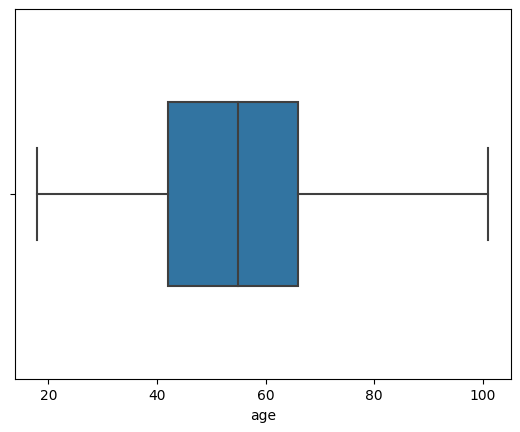

In [46]:
sns.boxplot(data= profile,x="age", width=0.5);

### Graph Reflection:
It seems to be like people with age greater than 80 don't use the app much or they may not drink much beverages. So, I consider people with the above age as outliers.

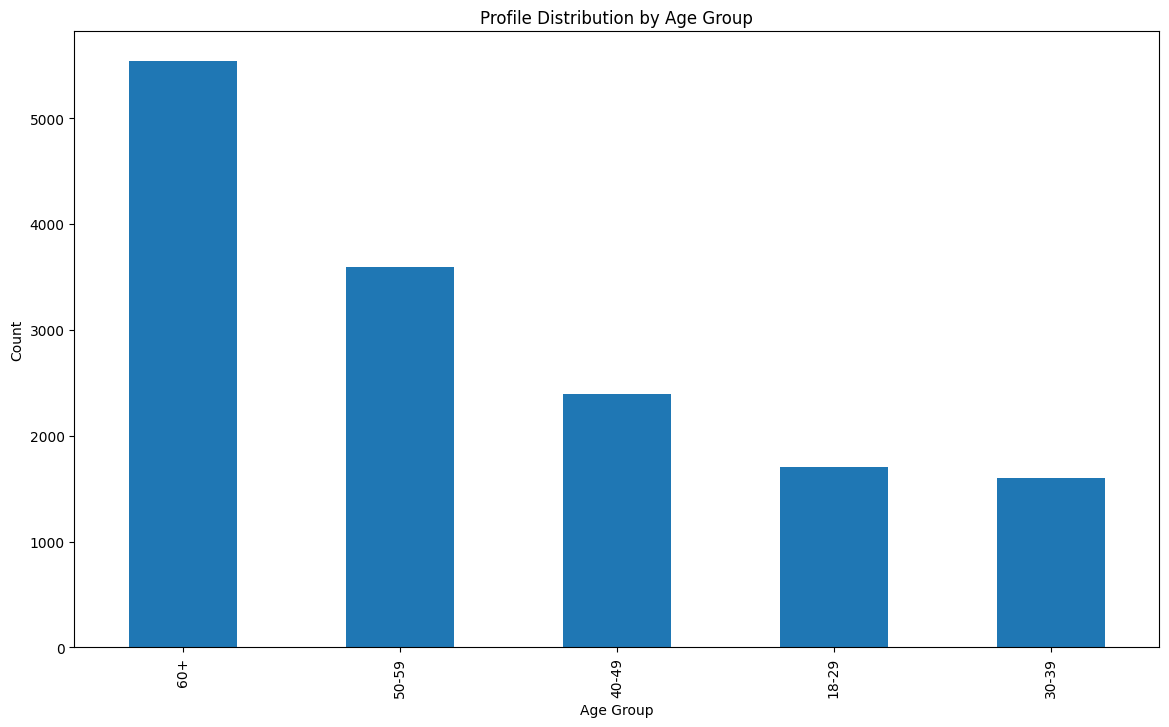

In [47]:
ax=profile["age_group"].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Profile Distribution by Age Group")
ax.set_xlabel("Age Group")
ax.set_ylabel("Count")
plt.show()

In [48]:
profile["age_group"].value_counts()

60+      5542
50-59    3590
40-49    2391
18-29    1705
30-39    1597
Name: age_group, dtype: int64

### Graph Reflection:
As shown above more than half of the costumers are adults.

### Gender counts in the profile dataframe

<Figure size 500x500 with 0 Axes>

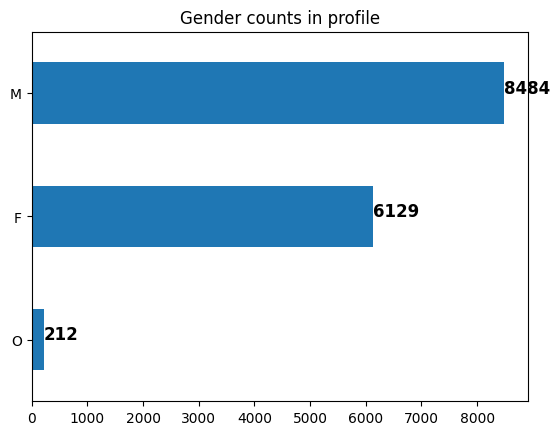

In [49]:
horizontal_bar_plot(profile, 'gender', "Gender counts in profile")

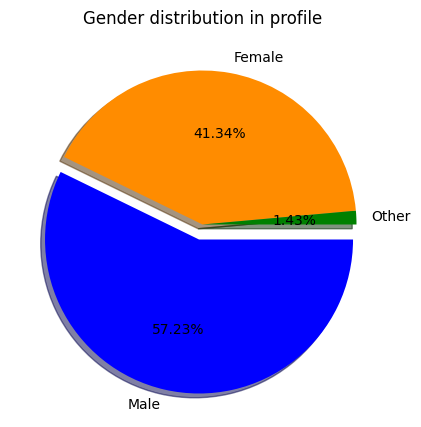

In [50]:
exploded_pie_plot(profile, 'gender', 'Gender distribution in profile', ['blue', 'darkorange', 'green'], ['Male', 'Female', 'Other'], (0.1, 0, 0))

### Graph Reflection:
Male represent higher percentage of the cutomers.

##### Q3 - What is the relationship between Gender , Income and age?


#### plot customer income against gender:

In [51]:

trace_1 = go.Box(
            y=profile[profile.gender == 'F'].income,
            name = 'Female',
            marker=dict(color = bupu[3]))

trace_2 = go.Box(
            y=profile[profile.gender == 'M'].income,
            name = 'Male',
            marker=dict(color = bupu[5]))

trace_3 = go.Box(
            y=profile[profile.gender == 'M'].income,
            name = 'Other',
            marker=dict(color = bupu[7]))

layout = go.Layout(title="Customers Income and Gender",
                        xaxis = dict(ticks='', nticks=48,
                                    title=go.layout.xaxis.Title(
                                    text='Gender'), automargin=True))



import plotly.graph_objects as go

fig = go.Figure(data=[trace_1, trace_2, trace_3], layout=layout)
fig.show(renderer="colab")

#### take a look at age and income distribution.

([<matplotlib.patches.Wedge at 0x7aa4108be020>,
 [Text(0.4124034278020155, 1.0197663520322426, '2017'),
  Text(-1.0999564318508754, -0.009790200707381212, '2018'),
  Text(-0.1573853067964785, -1.088682628319465, '2016'),
  Text(0.8159237440857308, -0.7377455142778727, '2015'),
  Text(1.0640364026574245, -0.27897407374135613, '2014'),
  Text(1.098146242753535, -0.06383439140694121, '2013')],
 [Text(0.2249473242556448, 0.5562361920175869, '37.8%'),
  Text(-0.5999762355550229, -0.005340109476753388, '24.7%'),
  Text(-0.08584653097989736, -0.5938268881742536, '20.4%'),
  Text(0.44504931495585315, -0.4024066441515669, '10.8%'),
  Text(0.5803834923585951, -0.15216767658619423, '4.5%'),
  Text(0.5989888596837463, -0.03481875894924066, '1.8%')])

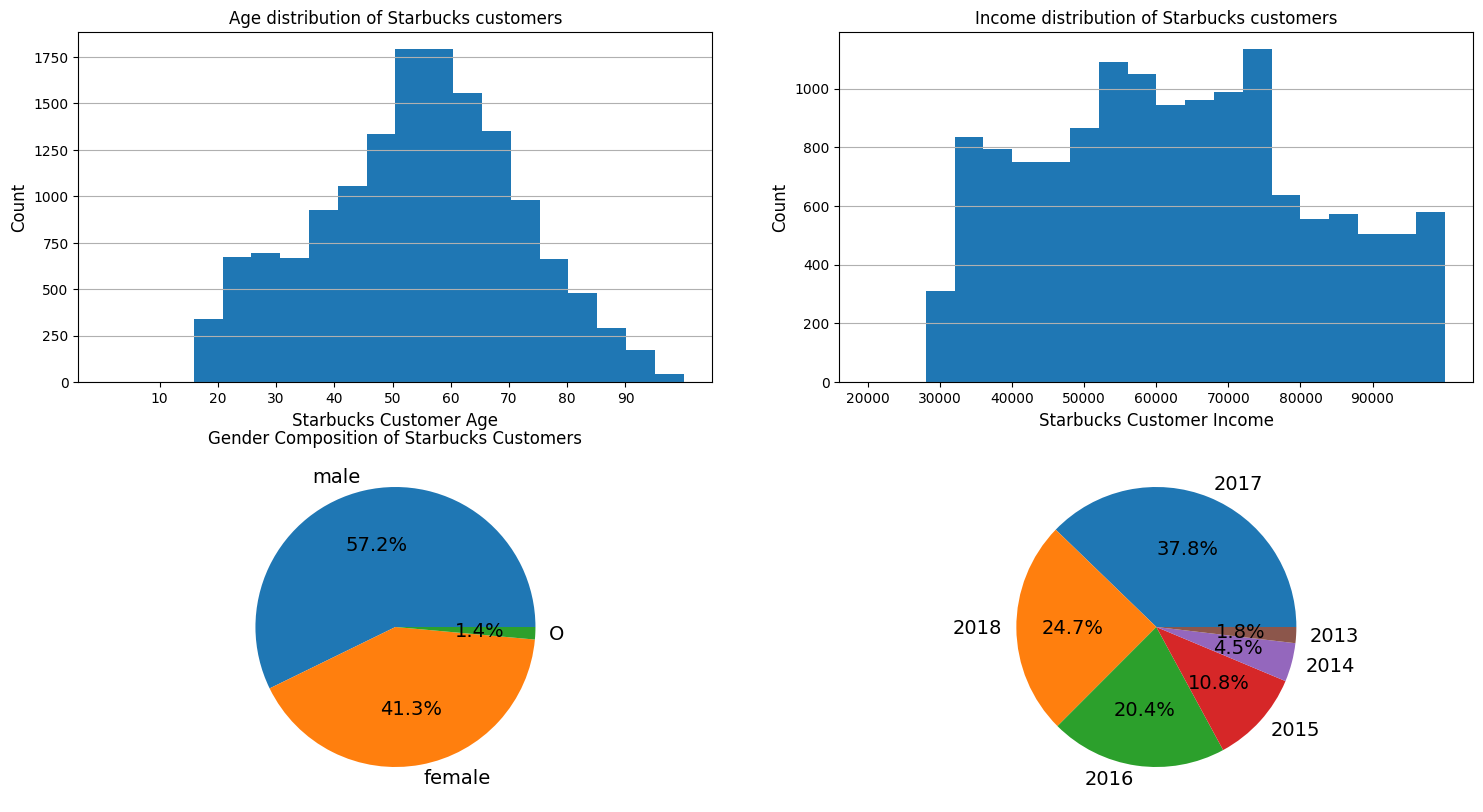

In [52]:
fig, ax = plt.subplots(2, 2, figsize=(18,10))
ax[0, 0].set_xticks(np.arange(10,100,10));
ax[0, 0].grid(which='major', axis='y')
ax[0, 0].set_title('Age distribution of Starbucks customers')
ax[0, 0].set_xlabel('Starbucks Customer Age', fontsize=12)
ax[0, 0].set_ylabel('Count', fontsize=12)
ax[0, 0].hist(profile.age, bins=20, range=(1,100));

# Take a look at the income distribution
ax[0, 1].set_xticks(np.arange(20000,100000,10000));
ax[0, 1].grid(which='major', axis='y')
ax[0, 1].set_title('Income distribution of Starbucks customers')
ax[0, 1].set_xlabel('Starbucks Customer Income', fontsize=12)
ax[0, 1].set_ylabel('Count', fontsize=12)

ax[0, 1].hist(profile.income, bins=20, range=(20000,100000));

#Check out the gender distribution of the users
ax[1, 0].pie(profile.gender.value_counts(), labels = ['male', 'female', 'O'], autopct='%1.1f%%', textprops={'fontsize': 14})
ax[1, 0].set_title('Gender Composition of Starbucks Customers')

#Check out the memebership years of the members
ax[1, 1].pie(profile.year.value_counts(), labels = profile.year.value_counts().index, autopct='%1.1f%%', textprops={'fontsize': 14})

### Graph Reflection

* This graph shows box plot of Income with respect to Gender, Females have higher income distrubtion.

* The two Scatter and Bar graphs show, how well Starbucks App is doing in term of aquiring new cusmters, we can see it increased in popularity in 2017, probably cuased by new lauched campaign?

##### Q4 - What age group affects Starbucks income?

<Figure size 500x500 with 0 Axes>

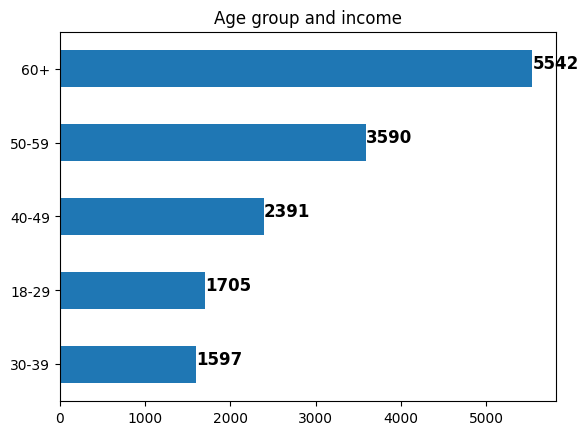

In [53]:
horizontal_bar_plot(profile, 'age_group', "Age group and income")

Graph Reflection

As shown, the elderly have high income so Starburst can focus on them.

##### Q5 - Is the subscription program useful and used by customers?

### plot customer membership based on month and year:

In [54]:
customers_data_month = profile.groupby('became_member_on')['month'].count().reset_index()
customers_data_month = customers_data_month.set_index('became_member_on')
customers_data_month = customers_data_month['month'].resample('MS').sum()

trace_4 = go.Scatter(x=customers_data_month.index,
                     y=customers_data_month,
                     name='Total',
                     mode='lines+markers',
                    marker=dict(
                    color=bupu[7]))

layout = go.Layout(title="Customers Trends Per Months",
                        barmode='overlay',
                        xaxis = dict(ticks='', nticks=60,
                                    title=go.layout.xaxis.Title(
                                    text='Date')),
                        yaxis = dict(title=go.layout.yaxis.Title(
                                    text='Count')))


import plotly.graph_objects as go

fig = go.Figure(data=[trace_4], layout=layout)
fig.show(renderer="colab")

In [55]:
customers_per_year_total = profile.became_member_on.groupby([profile.year]).count()
customers_per_year_female = profile[profile.gender == 'F'].became_member_on.groupby([profile.year]).count()
customers_per_year_male = profile[profile.gender == 'M'].became_member_on.groupby([profile.year]).count()
customers_per_year_other = profile[profile.gender == 'O'].became_member_on.groupby([profile.year]).count()


trace_1 = go.Bar(
    x = customers_per_year_total.index,
    y = customers_per_year_female,
    name = 'Female',
    #mode = 'lines',
    #legendgroup= 'group2',
    marker=dict(
            color=bupu[2])
)



trace_2 = go.Bar(
    x = customers_per_year_total.index,
    y = customers_per_year_male,
    name = 'Male',
    #mode = 'lines',
    #legendgroup= 'group2',
    marker=dict(
            color=bupu[4])
)


trace_3 = go.Bar(
    x = customers_per_year_total.index,
    y = customers_per_year_other,
    name = 'Other',
    marker=dict(
            color=bupu[6])
)

trace_4 = go.Scatter(
    x = customers_per_year_total.index,
    y = customers_per_year_total,
    name = 'Total per year',
    mode = 'lines+markers',
    #legendgroup= 'group2',
    marker=dict(
            color=bupu[6])
)

layout = go.Layout(title="Customers Per Year",
                        barmode='group',
                        xaxis = dict(ticks='', nticks=8,
                                    title=go.layout.xaxis.Title(
                                    text='Year')),
                        yaxis = dict(title=go.layout.yaxis.Title(
                                    text='Count')))

import plotly.graph_objects as go

fig = go.Figure(data=[trace_1, trace_2, trace_3 ,trace_4], layout=layout)
fig.show(renderer="colab")

In [56]:
print(f'''There are total of {profile.shape[0]} people,
{profile.gender.isna().sum()} of those did not put in their gender,
{profile.groupby('gender').count().loc['F','age']} of them are females,
{profile.groupby('gender').count().loc['M','age']} of them are males,
{profile.groupby('gender').count().loc['O','age']} are gender O.
''')

There are total of 14825 people,
0 of those did not put in their gender,
6129 of them are females,
8484 of them are males,
212 are gender O.



### Graph Reflection :

As shown, the number of subscribers has increased over the years, so we can answer the question yes, the subscription program is useful and the offers from Starbucks are good.

##### Q6 - What is the relationship between the customer attributes?

In [57]:
corr = profile[["age","income","year"]].corr()
corr.style.background_gradient(cmap='coolwarm')

,age,income,year
age,1.000000,0.306703,-0.013537
income,0.306703,1.000000,-0.029325
year,-0.013537,-0.029325,1.000000


### Graph Reflection :

As shown, there is a positive relationship between income and age, and opposite relationship between start year and age and income.

##### Q7 - What is the age and gender distribution in Starbucks customers?

<Axes: xlabel='age_group', ylabel='age'>

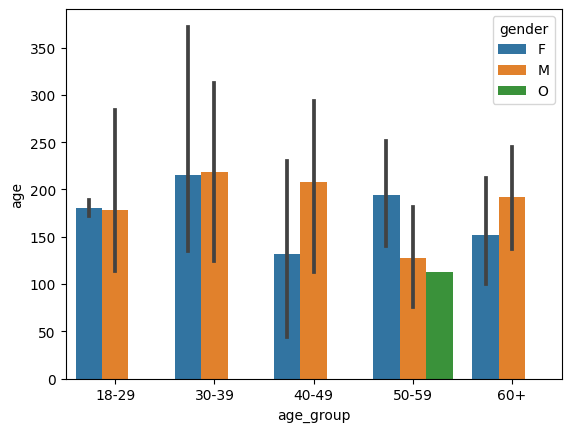

In [58]:
sns.barplot(x='age_group', y=profile.age.value_counts(), hue='gender', data=profile)

### Graph Reflection :

As shown, Men of all age groups outnumber women.

###### **Conclusion : Graph Reflection** :
We can look at the from different presepectives, these graphs will gives us a general idea about demographics, ages, income, with respect to gender.

* Male represent higher percentage of the cutomers so Starbucks can offers tailored to men.
* As shown above more than half of the costumers are adults, most customers are in the age 50 above
* It seems to be like people with age greater than 80 don't use the app much or they may not drink much beverages. So, I consider people with the above age as outliers.
* This graph shows box plot of Income with respect to Gender, Females have higher income distrubtion.
* The two Scatter and Bar graphs show, how well Starbucks App is doing in term of aquiring new cusmters, we can see it increased in popularity in 2017, probably cuased by new lauched campaign? Another interesting pattern is the rise of customers in Octoper-December, the holiday season is always great hit for Starbucks.
* Most of the customers joined at the year of 2017.
* There are total of 14825 people,
* 0 of those did not put in their gender,
* 6129 of them are females,
* 8484 of them are males,
* 212 are gender O.
* The number of subscribers has increased over the years, so we can answer the question yes, the subscription program is useful and the offers from Starbucks are good.
* there is a positive relationship between income and age, and opposite relationship between start year and age and income.
* elderly have high income so Starburst can focus on them.
* Men of all age groups outnumber women.


## Portfolio Analysis and Visualization

##### Q8 - What is the most preferred channel and offers?

([<matplotlib.patches.Wedge at 0x7aa417312110>,
 [Text(0.33991867422268784, 1.0461621742897658, 'bogo'),
  Text(-0.8899186574910393, -0.6465638275138399, 'discount'),
  Text(0.8899187482945414, -0.6465637025335375, 'informational')],
 [Text(0.1854101859396479, 0.5706339132489631, '40.0%'),
  Text(-0.48541017681329407, -0.3526711786439127, '40.0%'),
  Text(0.4854102263424771, -0.3526711104728386, '20.0%')])

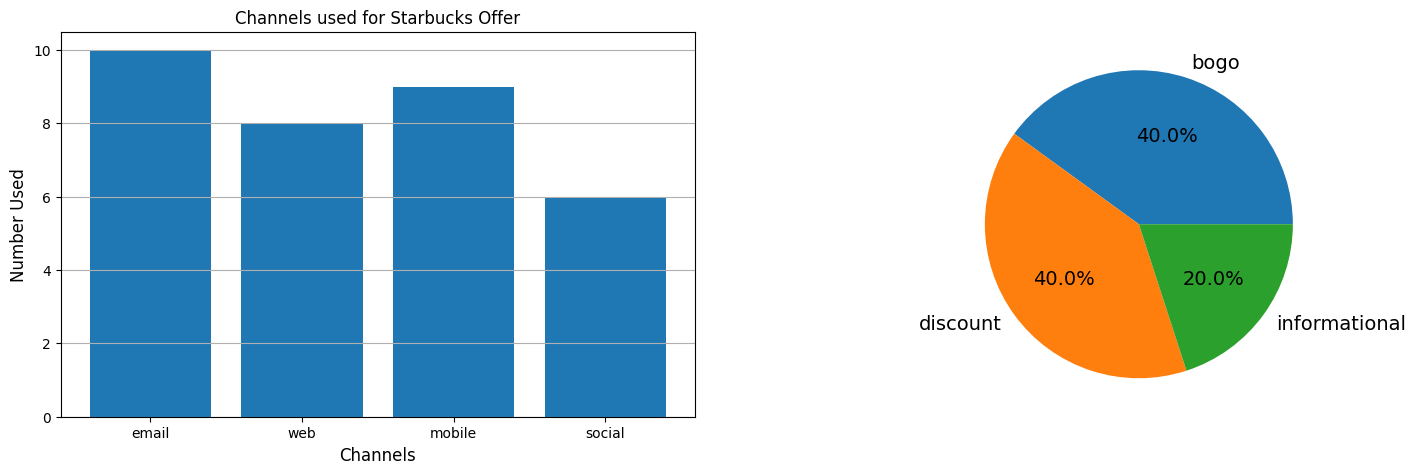

In [59]:
channels = ['email', 'web', 'mobile', 'social']
offer_type = ['val', 'bogo', 'discount', 'informational', 'no_offer']
fig, ax = plt.subplots(1, 2, figsize=(18,5))
# plot a bar chart on channels
ax[0].grid(which='major', axis='y')
ax[0].set_title('Channels used for Starbucks Offer')
ax[0].set_xlabel('Channels', fontsize=12)
ax[0].set_ylabel('Number Used', fontsize=12)
ax[0].bar(channels, portfolio[channels].sum());

#plot a pie plot on offers
ax[1].pie(portfolio.offer_type.value_counts(), labels = portfolio.offer_type.value_counts().index, autopct='%1.1f%%', textprops={'fontsize': 14})

<Figure size 500x500 with 0 Axes>

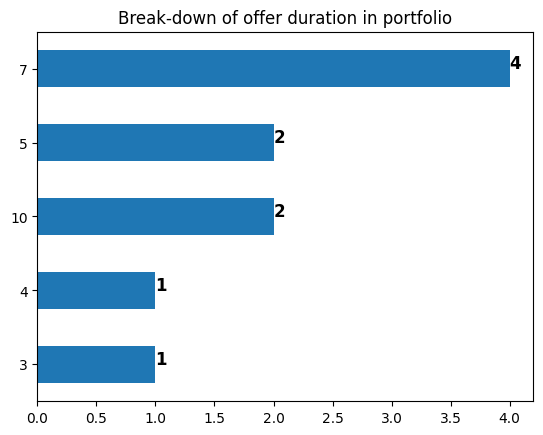

In [60]:
horizontal_bar_plot(portfolio, 'duration', "Break-down of offer duration in portfolio")

###### **Conclusion : Graph Reflection** :
* The most preferred method for sending promotion is through email, then through mobile.
* the most preferred type of offes are through discount and offers.

In [61]:
display(portfolio.offer_type.value_counts())

bogo             4
discount         4
informational    2
Name: offer_type, dtype: int64

### Transcript Data Visualization:

##### Q9 - What are the characteristics of cutomers transcripts?

This quesion lead to many new questions that will mainly be answerd from transcripts dataset. The data here is record of every transaction in the app, it contains four type of possible events (offer received, offer viewed, transaction, offer completed).

In [62]:
transcript.head()

,persone_id,event,time,amount,offer_id,reward,day
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,0
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0,0
2,e2127556f4f64592b11af22de27a7932,offer received,0,0.0,2906b810c7d4411798c6938adc9daaa5,0.0,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,0.0,fafdcd668e3743c1bb461111dcafc2a4,0.0,0
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,0.0,4d5c57ea9a6940dd891ad53e9dbe8da0,0.0,0


In [63]:
transcript.event.unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'],
      dtype=object)

##### plots distribution of events in trascript dataset:

In [64]:
events_distibution = transcript.event.groupby([transcript.event]).count().sort_values()

trace_4 = go.Bar(
    x = events_distibution.index,
    y = events_distibution,
    name = 'Events',
    #mode = 'lines',
    legendgroup= 'group2',
    marker=dict(
            color=bupu[3:])
)

layout = go.Layout(title="Event Distibutions",
                        xaxis = dict(ticks='', nticks=8,
                                    title=go.layout.xaxis.Title(
                                    text='Year'), automargin=True),
                        yaxis = dict(title=go.layout.yaxis.Title(
                                    text='Count')))


import plotly.graph_objects as go

fig = go.Figure(data=[trace_4], layout=layout)
fig.show(renderer="colab")

([<matplotlib.patches.Wedge at 0x7aa41a726fb0>,
 [Text(0.1607925537491071, 1.0881846142354894, 'transaction'),
  Text(-0.9714225590847284, -0.5160796563528516, 'offer received'),
  Text(0.31549684071996675, -1.0537844862663903, 'offer viewed'),
  Text(1.0355014599237367, -0.3711289890264706, 'offer completed')],
 [Text(0.08770502931769476, 0.5935552441284486, '45.3%'),
  Text(-0.5298668504098518, -0.28149799437428263, '24.9%'),
  Text(0.17208918584725458, -0.5747915379634855, '18.8%'),
  Text(0.56481897814022, -0.20243399401443848, '11.0%')])

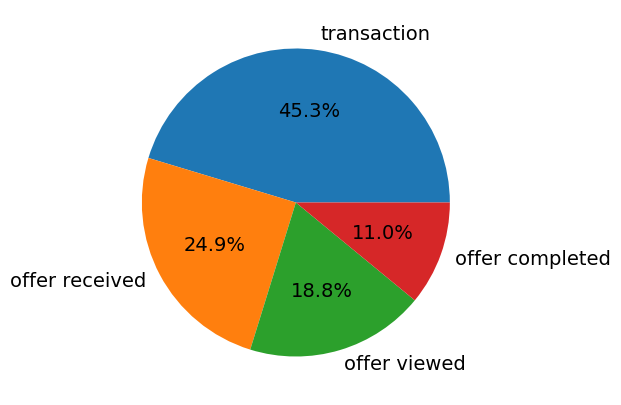

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(18,5))
ax.pie(transcript.event.value_counts(), labels = transcript.event.value_counts().index, autopct='%1.1f%%', textprops={'fontsize': 14})

###### Graph Reflection:

* Transactions account for ~45% of records, followed by offer recieved, and offer viewed, and lastly offer completed with ~11% (which indicates that customer has achieved the required amount to benefit from the offers).

##### Q10 - What is  the completion rate and view rate of offers?

> Indented block



One important aspect of any offer campaign is to measure the visibilty rate and completion rate of the sent offer, it is calculated as:

offer_visibilty = offers viewed/offers recieved


offer_completion = offers completed/offers recieved

In [66]:
# method to calculate offer_completion, and offer_visibilty:
def calculate_offer_matrix(portfolio):
    offer_visibilty = transcript[transcript.event == 'offer viewed'].groupby([transcript.offer_id])['event'].count()/transcript[transcript.event == 'offer received'].groupby([transcript.offer_id])['event'].count()*100
    offer_completion = transcript[transcript.event == 'offer completed'].groupby([transcript.offer_id])['event'].count()/transcript[transcript.event == 'offer received'].groupby([transcript.offer_id])['event'].count()*100
    portfolio = pd.merge(portfolio,offer_completion, on='offer_id', how='left')
    portfolio = pd.merge(portfolio,offer_visibilty, on='offer_id', how='left')
    portfolio.rename(columns={'event_x': 'offer_completion', 'event_y': 'offer_visibilty'}, inplace=True)
    return portfolio

In [67]:
portfolio = calculate_offer_matrix(portfolio)
portfolio

,offer_reward,difficulty,duration,offer_type,offer_id,email,mobile,social,web,offer_completion,offer_visibilty
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0,48.158788,87.699138
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1,43.869353,96.114843
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1,NaN,54.404621
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1,56.714863,54.331119
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1,44.600939,34.728743
5,3,7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1,67.433952,95.958671
6,2,10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1,69.988153,96.445966
7,0,0,3,informational,5a8bc65990b245e5a138643cd4eb9837,1,1,1,0,NaN,87.778945
8,5,5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1,56.742835,95.945053
9,2,10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,1,0,1,52.633648,53.957023


In [68]:
# plot completetion rate with respect to visibilty rate:
trace_1 = go.Bar(
    x = portfolio.offer_id + " - " + portfolio.offer_type,
    y = portfolio.offer_completion,
    name = 'offer_completion',
    marker=dict(
            color=bupu[6])
)

trace_2 = go.Bar(
    x = portfolio.offer_id + " - " + portfolio.offer_type,
    y = portfolio.offer_visibilty,
    name = 'offer_visibilty',
    marker=dict(
            color=bupu[4])
)

layout = go.Layout(title="Offer Completion",
                        xaxis = dict(ticks='', nticks=12,
                                    title=go.layout.xaxis.Title(
                                    text='offer'), automargin=True),
                        yaxis = dict(title=go.layout.yaxis.Title(
                                    text='Percentage %')))


import plotly.graph_objects as go

fig = go.Figure(data=[trace_1, trace_2], layout=layout)
fig.show(renderer="colab")

###### Graph Reflection:

We can see no correlation between viewing rate and completion rate, which may confirm the hypothesis that customers complete offers out of normal purchase habits without the influnce of offers.

##### Q11 - What is the customers retention rate, and customer churn rate?

Customer churn rate, refers to the action of losing a custmer, and customer retention rate, is the retained customers. There are many equations to calculate these variables, since it plays major difference in the commerce industry, as we want to minimise the customer churn rate and maximise the retention rate. In this graph we can see a count of how many customers lost/gained in a given day, based on transactions data:

In [69]:
# method to get new customers:
# new customer who makes a transaction without having any previous transactions:
def get_new_customers(df):
    new_customers = {}
    all_customer = []
    for i ,row in df.iterrows():
        day_customers = transcript[(transcript.event == 'transaction') & (transcript.day == i)].persone_id.unique()
        new_customers[i] = len(set(day_customers).difference(set(all_customer)))
        all_customer.extend(day_customers)
    return new_customers

In [70]:
# method to get lost customers:
# lost customer who no longer makes a transaction in the remaining of simulation period:
def get_lost_customers(df):
    lost_customers = {}
    days = len(df)
    for i ,row in df.iterrows():
        all_customers = []
        day_customers = transcript[(transcript.event == 'transaction') & (transcript.day == i)].persone_id.unique()
        for x in range(i+1, days):
            all_customers.extend(transcript[(transcript.event == 'transaction') & (transcript.day == x)].persone_id.unique())
        lost_customers[i] = len(set(day_customers).difference(set(all_customers)))
    return lost_customers

In [71]:
# method to constuct dataframe of daily customers habits:
def get_daily_customers():
    daily_customers = pd.pivot_table(transcript[transcript.event == 'transaction'], values=['event', 'amount'], index=['day'],
                    aggfunc={'day': 'count',
                            'amount': np.sum})

    daily_customers['new_customers'] = list(get_new_customers(daily_customers).values())
    daily_customers['lost_customers'] = list(get_lost_customers(daily_customers).values())
    return daily_customers

In [72]:
daily_customers = get_daily_customers()
daily_customers

,amount,day,new_customers,lost_customers
day,,,,
0,30088.74,2280,2098,1
1,38192.13,2829,1990,0
2,65682.45,5161,2713,3
3,34665.78,3090,1194,0
4,63101.94,4918,1494,1
5,32925.72,2762,696,2
6,52719.32,4048,916,6
7,33444.34,2793,611,4
8,74370.72,5709,1005,14


In [73]:
# plot daily customer interactins (lost/new) for the simulation period:
trace_3 = go.Bar(x=daily_customers.index,
                     y=daily_customers.new_customers,
                     name='New Customers',
                     #mode='lines+markers',
                    marker=dict(
                    color=bupu[3]))

trace_4 = go.Bar(x=daily_customers.index,
                     y=daily_customers.lost_customers,
                     name='Lost Customers',
                     #mode='lines',
                    marker=dict(
                    color=bupu[7]))


layout = go.Layout(title="Customer Trends Per Day",
                        barmode='overlay',
                        xaxis = dict(ticks='', nticks=60,
                                    title=go.layout.xaxis.Title(
                                    text='Day')),
                        yaxis = dict(title=go.layout.yaxis.Title(
                                    text='Count')),
                        yaxis3=dict(title="yaxis4 title", anchor="x",
                            overlaying="y",side="right"))



import plotly.graph_objects as go

fig = go.Figure(data=[trace_3,trace_4], layout=layout)
fig.show(renderer="colab")

###### Graph Reflection:

Obviously, this is not an actual indicator of any alarming situation, since the data is simulated and set at fixed timeframe, yet it will be extremely valuable when set on real data for analysis.

### plot daily transactions and amount:

In [74]:
trace_1 = go.Scatter(x=daily_customers.index,
                     y=daily_customers.amount,
                     name='Sales',
                     mode='lines',
                    marker=dict(
                    color=bupu[7]))

trace_2 = go.Scatter(x=daily_customers.index,
                     y=daily_customers.day,
                     name='Transactions',
                     mode='lines+markers',
                    marker=dict(
                    color=bupu[3]), yaxis="y3")

layout = go.Layout(title="Sales Trends Per Day",
                        barmode='overlay',
                        legend_orientation="h",
                        xaxis = dict(ticks='', nticks=60,
                                    title=go.layout.xaxis.Title(
                                    text='Day')),
                        yaxis = dict(title=go.layout.yaxis.Title(
                                    text='Transactions')),
                        yaxis3=dict(title="Sales", anchor="x", nticks=15,
                            overlaying="y",side="right", automargin=True, position=0.10))



import plotly.graph_objects as go

fig = go.Figure(data=[trace_1,trace_2], layout=layout)
fig.show(renderer="colab")

###### Graph Reflection:

It would be far more suprising we it was based on real time dataset!

##### Q12 - What is the average completion time of an offer?

In [75]:
# method to calculate the average offer completion time in days:
def calculate_offer_completion(portfolio):
    transcript_completion = pd.pivot_table(transcript[transcript.event.isin(['offer completed', 'offer received'])], values=['day',], index=['offer_id', 'persone_id', 'event'],
                    aggfunc={'day': np.sum}).unstack()
    transcript_completion['day', 'completion_time'] = transcript_completion.day['offer completed'] - transcript_completion.day['offer received']
    transcript_completion.reset_index(inplace=True)
    transcript_completion[transcript_completion.day['completion_time'] < 0] = np.NaN
    transcript_completion.dropna(inplace=True)

    transcript_completion = transcript_completion.groupby([transcript_completion.offer_id]).mean()
    transcript_completion = transcript_completion.day
    transcript_completion.drop(['offer completed','offer received'], axis=1, inplace=True)

    portfolio = pd.merge(portfolio,transcript_completion, left_on='offer_id', right_on=transcript_completion.index, how='left')
    return portfolio

In [76]:
portfolio = calculate_offer_completion(portfolio)
portfolio

<ipython-input-75-597cc99fd845>:10: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,offer_reward,difficulty,duration,offer_type,offer_id,email,mobile,social,web,offer_completion,offer_visibilty,completion_time
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0,48.158788,87.699138,2.645161
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1,43.869353,96.114843,2.033716
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1,NaN,54.404621,NaN
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1,56.714863,54.331119,2.786039
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1,44.600939,34.728743,4.931047
5,3,7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1,67.433952,95.958671,2.749941
6,2,10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1,69.988153,96.445966,3.549977
7,0,0,3,informational,5a8bc65990b245e5a138643cd4eb9837,1,1,1,0,NaN,87.778945,NaN
8,5,5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1,56.742835,95.945053,1.999710
9,2,10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,1,0,1,52.633648,53.957023,3.088490


In [77]:
# plot the customers average completion time against offer duration:
x = portfolio[portfolio.completion_time.notna()]

trace_1 = go.Scatter(x=x.offer_id + " - " + x.offer_type,
                     y=x.duration,
                     name='Offer Duration',
                     mode='lines',
                    marker=dict(
                    color=bupu[5]))

trace_2 = go.Bar(
    x = x.offer_id + " - " + x.offer_type,
    y = x.completion_time,
    name = 'offer_time_completion',
    marker=dict(
            color=bupu[1:])
)

layout = go.Layout(title="Offer Time Completion vs. Offer Duration",
                        xaxis = dict(ticks='', nticks=12,
                                    title=go.layout.xaxis.Title(
                                    text='offer'), automargin=True),
                        yaxis = dict(title=go.layout.yaxis.Title(
                                    text='Days')))

import plotly.graph_objects as go

fig = go.Figure(data=[trace_1, trace_2], layout=layout)
fig.show(renderer="colab")

###### Graph Reflection:

This will gives us an estimation  of how long we should run an offer, for example if the majority of custmers will complete the offer in more than 50% the specified time it means the initial estimate was invalid and we could be running new offers to enhance customer engagements.

##### Q13 - What are the characteristics of customers interactions with the offers?

There are many aspects we can look at when considering customer and offer iteractions, however we will focus on Age, and Loyalty and how it reflected on transactions and completion of offers.

In [78]:
# get merged dataframe to perform complete analysis:
df = merged_datafram(profile, transcript, portfolio)

In [79]:
df.head()

,offer_reward,difficulty,duration,offer_type,offer_id,email,mobile,social,web,offer_completion,offer_visibilty,completion_time,persone_id,event,time,amount,reward,day,gender,age,became_member_on,income,year,month,loyalty,age_group
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0,48.158788,87.699138,2.645161,4b0da7e80e5945209a1fdddfe813dbe0,offer received,0,0.0,0.0,0,M,64,2017-09-09,100000.0,2017,9,2,60+
1,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0,48.158788,87.699138,2.645161,4b0da7e80e5945209a1fdddfe813dbe0,offer viewed,102,0.0,0.0,4,M,64,2017-09-09,100000.0,2017,9,2,60+
2,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0,48.158788,87.699138,2.645161,4b0da7e80e5945209a1fdddfe813dbe0,offer received,504,0.0,0.0,21,M,64,2017-09-09,100000.0,2017,9,2,60+
3,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0,48.158788,87.699138,2.645161,4b0da7e80e5945209a1fdddfe813dbe0,offer viewed,510,0.0,0.0,21,M,64,2017-09-09,100000.0,2017,9,2,60+
4,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0,48.158788,87.699138,2.645161,4b0da7e80e5945209a1fdddfe813dbe0,offer completed,510,0.0,10.0,21,M,64,2017-09-09,100000.0,2017,9,2,60+


In [80]:
df[df.event=='transaction'].isnull().sum(axis = 0)

offer_reward        0.0
difficulty          0.0
duration            0.0
offer_type          0.0
offer_id            0.0
email               0.0
mobile              0.0
social              0.0
web                 0.0
offer_completion    0.0
offer_visibilty     0.0
completion_time     0.0
persone_id          0.0
event               0.0
time                0.0
amount              0.0
reward              0.0
day                 0.0
gender              0.0
age                 0.0
became_member_on    0.0
income              0.0
year                0.0
month               0.0
loyalty             0.0
age_group           0.0
dtype: float64

In [81]:
df.head()

,offer_reward,difficulty,duration,offer_type,offer_id,email,mobile,social,web,offer_completion,offer_visibilty,completion_time,persone_id,event,time,amount,reward,day,gender,age,became_member_on,income,year,month,loyalty,age_group
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0,48.158788,87.699138,2.645161,4b0da7e80e5945209a1fdddfe813dbe0,offer received,0,0.0,0.0,0,M,64,2017-09-09,100000.0,2017,9,2,60+
1,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0,48.158788,87.699138,2.645161,4b0da7e80e5945209a1fdddfe813dbe0,offer viewed,102,0.0,0.0,4,M,64,2017-09-09,100000.0,2017,9,2,60+
2,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0,48.158788,87.699138,2.645161,4b0da7e80e5945209a1fdddfe813dbe0,offer received,504,0.0,0.0,21,M,64,2017-09-09,100000.0,2017,9,2,60+
3,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0,48.158788,87.699138,2.645161,4b0da7e80e5945209a1fdddfe813dbe0,offer viewed,510,0.0,0.0,21,M,64,2017-09-09,100000.0,2017,9,2,60+
4,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0,48.158788,87.699138,2.645161,4b0da7e80e5945209a1fdddfe813dbe0,offer completed,510,0.0,10.0,21,M,64,2017-09-09,100000.0,2017,9,2,60+


##### - Average transactions based on customer demographics:

In [82]:
# plot average transactions based on gender:
transactions_per_person_female = df[(df.event =='transaction') & (df.gender =='F') ].groupby([df.persone_id]).event.count().sort_values()
transactions_per_person_male = df[(df.event =='transaction') & (df.gender =='M') ].groupby([df.persone_id]).event.count().sort_values()
transactions_per_person_other = df[(df.event =='transaction') & (df.gender =='O') ].groupby([df.persone_id]).event.count().sort_values()



trace_1 = go.Box(
            x=transactions_per_person_female,
            name = 'Female',
            boxpoints='suspectedoutliers',
            marker=dict(color = bupu[4]))

trace_2 = go.Box(
            x=transactions_per_person_male,
            name = 'Male',
            boxpoints='suspectedoutliers',
            marker=dict(color = bupu[7]))


trace_3 = go.Box(
            x=transactions_per_person_other,
            name = 'Other',
            boxpoints='suspectedoutliers',
            marker=dict(color = bupu[2]))

layout = go.Layout(title="Average Transactions",
                        xaxis = dict(ticks='', nticks=48,
                                    title=go.layout.xaxis.Title(
                                    text='Transactions'), automargin=True))


import plotly.graph_objects as go

fig = go.Figure(data=[trace_1, trace_2, trace_3], layout=layout)
fig.show(renderer="colab")

In [83]:
# plot transactions by age and gender:
transactions_per_age_female = df[(df.event =='transaction') & (df.gender =='F') ].groupby([df.age]).event.count().sort_values()
transactions_per_age_male = df[(df.event =='transaction') & (df.gender =='M') ].groupby([df.age]).event.count().sort_values()


trace_1 = go.Bar(
            x=transactions_per_age_female.index,
            y= transactions_per_age_female,
            name = 'Female',
            marker=dict(color = bupu[4]))

trace_2 = go.Bar(
            x=transactions_per_age_male.index,
            y= transactions_per_age_male,
            name = 'Male',
            marker=dict(color = bupu[7]))

layout = go.Layout(title="Average Age Transactions",
                        #barmode='overlay',
                        xaxis = dict(ticks='', nticks=48,
                                    title=go.layout.xaxis.Title(
                                    text='Transactions'), automargin=True))



import plotly.graph_objects as go

fig = go.Figure(data=[trace_1, trace_2], layout=layout)
fig.show(renderer="colab")

In [84]:
# plot transactions based on gender and income:
transactions_per_income_female = df[(df.event =='transaction') & (df.gender =='F') ].groupby([df.income]).event.count().sort_values()
transactions_per_income_male = df[(df.event =='transaction') & (df.gender =='M') ].groupby([df.income]).event.count().sort_values()


trace_1 = go.Bar(
            x=transactions_per_income_female.index,
            y= transactions_per_income_female,
            name = 'Female',
            marker=dict(color = bupu[4]))

trace_2 = go.Bar(
            x=transactions_per_income_male.index,
            y= transactions_per_income_male,
            name = 'Male',
            marker=dict(color = bupu[7]))

layout = go.Layout(title="Average Income Transactions",
                        #barmode='overlay',
                        xaxis = dict(ticks='', nticks=48,
                                    title=go.layout.xaxis.Title(
                                    text='Transactions'), automargin=True))


import plotly.graph_objects as go

fig = go.Figure(data=[trace_1, trace_2], layout=layout)
fig.show(renderer="colab")

###### Graph Reflection:

From the obove graphs, tt's interesting to see:
* Males make more transactions than Females

In [85]:
## Q 1. Average income of customers using the app

In [86]:
df['income'].mean()

66414.11914922214

<ipython-input-87-38676f2f1dee>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




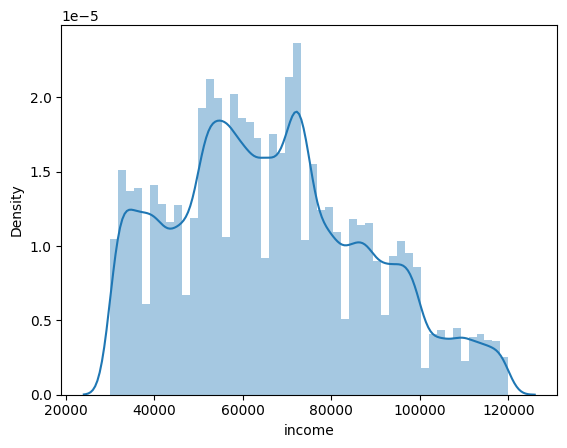

In [87]:
sns.distplot(df['income'], bins=50, hist_kws={'alpha': 0.4});

##### - Loyalty and average transactions / completion

In [88]:
# plot distrbution of offer completed based on customer loyalty years:
customer_loyalty_completion = df[(df.event =='offer completed')].groupby([df.persone_id, df.loyalty]).event.count().reset_index()

completion_per_person_1 = customer_loyalty_completion[customer_loyalty_completion.loyalty==1].event
completion_per_person_2 = customer_loyalty_completion[customer_loyalty_completion.loyalty==2].event
completion_per_person_3 = customer_loyalty_completion[customer_loyalty_completion.loyalty==3].event
completion_per_person_4 = customer_loyalty_completion[customer_loyalty_completion.loyalty==4].event
completion_per_person_5 = customer_loyalty_completion[customer_loyalty_completion.loyalty==5].event
completion_per_person_6 = customer_loyalty_completion[customer_loyalty_completion.loyalty==6].event

trace_1 = go.Box(
            y=completion_per_person_1,
            name = '1',
            boxpoints='all',
            marker=dict(color = bupu[2]))

trace_2 = go.Box(
            y=completion_per_person_2,
            name = '2',
            boxpoints='all',
            marker=dict(color = bupu[3]))

trace_3 = go.Box(
            y=completion_per_person_3,
            name = '3',
            boxpoints='all',
            marker=dict(color = bupu[4]))

trace_4 = go.Box(
            y=completion_per_person_4,
            name = '4',
            boxpoints='all',
            marker=dict(color = bupu[5]))

trace_5 = go.Box(
            y=completion_per_person_5,
            name = '5',
            boxpoints='all',
            marker=dict(color = bupu[6]))

trace_6 = go.Box(
            y=completion_per_person_6,
            name = '6',
            boxpoints='all',
            marker=dict(color = bupu[7]))

layout = go.Layout(title="Average completion",
                        xaxis = dict(ticks='', nticks=48,
                                    title=go.layout.xaxis.Title(
                                    text='Completed Offers'), automargin=True))


import plotly.graph_objects as go

fig = go.Figure(data=[trace_1, trace_2, trace_3,trace_4, trace_5, trace_6], layout=layout)
fig.show(renderer="colab")

In [89]:
# plot distrbution of transaction based on customer loyalty years:

customer_loyalty = df[(df.event =='transaction')].groupby([df.persone_id, df.loyalty]).event.count().reset_index()

transaction_per_person_1 = customer_loyalty[customer_loyalty.loyalty==1].event
transaction_per_person_2 = customer_loyalty[customer_loyalty.loyalty==2].event
transaction_per_person_3 = customer_loyalty[customer_loyalty.loyalty==3].event
transaction_per_person_4 = customer_loyalty[customer_loyalty.loyalty==4].event
transaction_per_person_5 = customer_loyalty[customer_loyalty.loyalty==5].event
transaction_per_person_6 = customer_loyalty[customer_loyalty.loyalty==6].event

trace_1 = go.Box(
            y=transaction_per_person_1,
            name = '1',
            boxpoints='all',
            marker=dict(color = bupu[2]))

trace_2 = go.Box(
            y=transaction_per_person_2,
            name = '2',
            boxpoints='all',
            marker=dict(color = bupu[3]))

trace_3 = go.Box(
            y=transaction_per_person_3,
            name = '3',
            boxpoints='all',
            marker=dict(color = bupu[4]))

trace_4 = go.Box(
            y=transaction_per_person_4,
            name = '4',
            boxpoints='all',
            marker=dict(color = bupu[5]))

trace_5 = go.Box(
            y=transaction_per_person_5,
            name = '5',
            boxpoints='all',
            marker=dict(color = bupu[6]))

trace_6 = go.Box(
            y=transaction_per_person_6,
            name = '6',
            boxpoints='all',
            marker=dict(color = bupu[7]))

layout = go.Layout(title="Average Transactions",
                        xaxis = dict(ticks='', nticks=48,
                                    title=go.layout.xaxis.Title(
                                    text='Transactions'), automargin=True))


import plotly.graph_objects as go

fig = go.Figure(data=[trace_1, trace_2, trace_3,trace_4, trace_5, trace_6], layout=layout)
fig.show(renderer="colab")

###### Graph Reflection:

Here we can spot the greater a customer has been a member the lower offers completed, which may gives us an indication that the custmer will continue to make transactions without the need to send offers.

##### Q14 - Gender distribution in each offer type

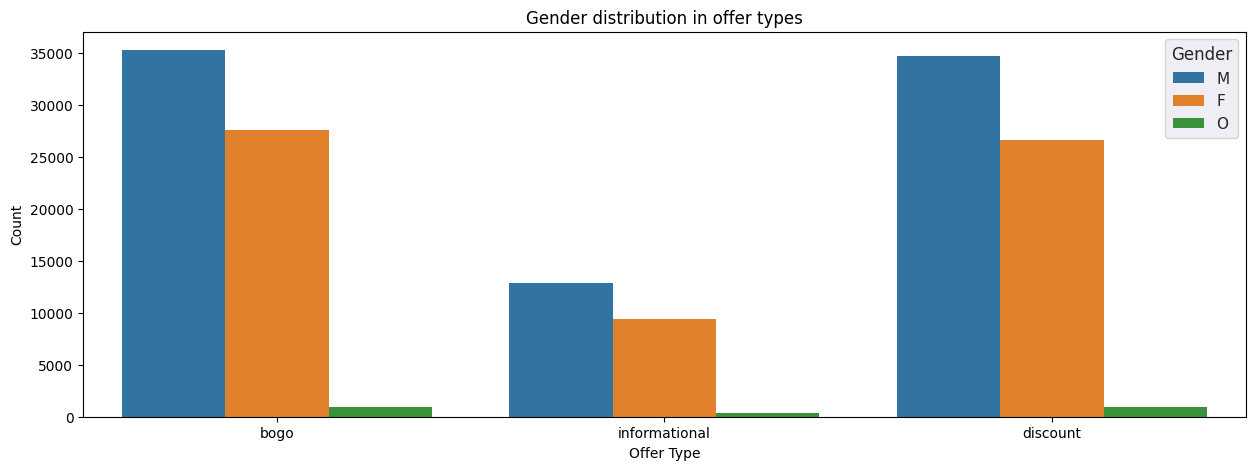

In [90]:
plt.figure(figsize=(15, 5))
sns.countplot(x= "offer_type", hue= "gender", data=df)
sns.set(style="darkgrid")
plt.title('Gender distribution in offer types')
plt.ylabel('Count')
plt.xlabel('Offer Type')
plt.legend(title='Gender')

## Customer Segmentation Model:

In this section we will use KMeans algorithem to cluster custmers into groups based on similar behaviours.we need to transform our merged data of (offers, transactions, and profiles) to fit into ML model. This can be done in few steps:


1. Convert categorical features to numeric,
2. Convert numric features to fixed bins (such as age, income),
3. Scale numeric data,

In [91]:
# Function to
# 1. Convert categorical features to numric
# 2. Convert numric features to fixed bins (such as age, income)

def feature_engineering(df):
    bins = [18, 24, 34, 44, 54, 120]
    labels = ['Teens', 'Young Adults', 'Adults', 'Middle-aged','Elders']
    df['age_group'] = pd.cut(df.age, bins, labels = labels,include_lowest = True)

    bins = [30000, 40000, 50000, 69000, 70000, 80000,120000]
    labels = ['30-40K', '40-50K', '50-60K', '60-70K','70-80K', '80K+']
    df['income_group'] = pd.cut(df.income, bins, labels = labels,include_lowest = True)

    features_raw = df.drop(['offer_id','age', 'income','persone_id','time', 'day','loyalty','became_member_on', 'year','month', 'amount', 'offer_completion', 'offer_visibilty', 'completion_time','reward'], axis = 1)

    features_raw = pd.get_dummies(features_raw, columns = ['income_group', 'age_group'])

    features_raw['gender'] = features_raw['gender'].map({'M':0, 'F':1, 'O':2})
    features_raw['offer_type'] = features_raw['offer_type'].map({'bogo':0, 'discount':1,'informational':3})
    features_raw['event'] = features_raw['event'].map({'offer received':1, 'offer viewed':2, 'offer completed':3})


    return features_raw


In [92]:
# Function to :
# Scale numric data

numerical = ['difficulty', 'duration', 'offer_reward']
def feature_scaling(df):
    scaler = MinMaxScaler() # default=(0, 1)
    features_transformed = pd.DataFrame(data = df)
    features_transformed[numerical] = scaler.fit_transform(df[numerical])

    return features_transformed, scaler

In [93]:
features_raw = feature_engineering(df)

In [94]:
features_final, scaler = feature_scaling(features_raw)
features_final = features_final.astype(np.float64)

In [95]:
features_raw.head()

,offer_reward,difficulty,duration,offer_type,email,mobile,social,web,event,gender,income_group_30-40K,income_group_40-50K,income_group_50-60K,income_group_60-70K,income_group_70-80K,income_group_80K+,age_group_Teens,age_group_Young Adults,age_group_Adults,age_group_Middle-aged,age_group_Elders
0,10,10,7,0,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1
1,10,10,7,0,1,1,1,0,2,0,0,0,0,0,0,1,0,0,0,0,1
2,10,10,7,0,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1
3,10,10,7,0,1,1,1,0,2,0,0,0,0,0,0,1,0,0,0,0,1
4,10,10,7,0,1,1,1,0,3,0,0,0,0,0,0,1,0,0,0,0,1


In [96]:
features_final.head()

,offer_reward,difficulty,duration,offer_type,email,mobile,social,web,event,gender,income_group_30-40K,income_group_40-50K,income_group_50-60K,income_group_60-70K,income_group_70-80K,income_group_80K+,age_group_Teens,age_group_Young Adults,age_group_Adults,age_group_Middle-aged,age_group_Elders
0,1.0,0.5,0.571429,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.5,0.571429,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.5,0.571429,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.5,0.571429,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.5,0.571429,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [97]:
# Investigate the variance accounted for by each principal component.

def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components

    INPUT: pca - the result of instantian of PCA in scikit learn

    OUTPUT:
            None
    '''
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_

    plt.figure(figsize=(20, 10))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)

    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)

    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

### Apply Clustering - Kmeans

In [98]:
from sklearn.cluster import KMeans


def fit_kmeans(data, centers):
    '''
    INPUT:
        data = the dataset you would like to fit kmeans to (dataframe)
        centers = the number of centroids (int)
    OUTPUT:
        labels - the labels for each datapoint to which group it belongs (nparray)

    '''
    kmeans = KMeans(centers)
    labels = kmeans.fit_predict(data)
    return labels


def get_kmeans_score(data, center):
    '''
    returns the kmeans score regarding SSE for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the SSE score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center)

    # Then fit the model to your data using the fit method
    model = kmeans.fit(data)

    # Obtain a score related to the model fit
    score = np.abs(model.score(data))

    return score

def fit_mods(data, end):
    scores = []
    centers = list(range(1,end))

    for center in centers:
        scores.append(get_kmeans_score(data, center))

    return centers, scores

def plot_cluster(centers, scores):
    plt.plot(centers, scores, linestyle='--', marker='o', color='b');
    plt.xlabel('K');
    plt.ylabel('SSE');
    plt.title('SSE vs. K');



Since we have relatively small number of features PCA will not be implemted, rather we will fit the data into KMeans algorithm.


Starting with randomly set number of clusters, we will evaluate the result to define the final number of recommended clusers based on the Square Sum of Errors (SSE) since we want to cluster cusmter by closeness as they relate to the mean of the cluster.

In [99]:
# fit dataset to Kmeans ML model:
centers, scores = fit_mods(features_final, 30)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

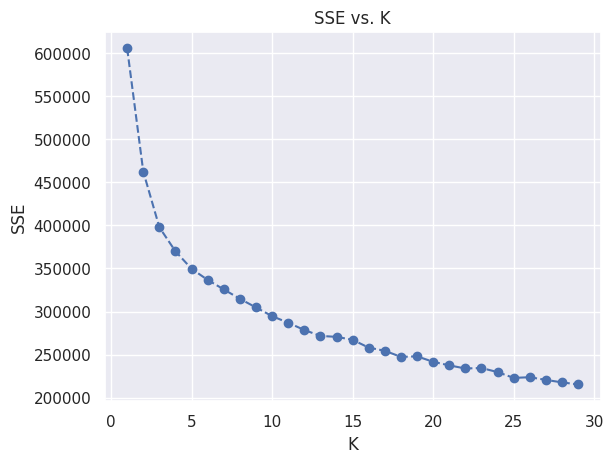

In [100]:
# plot the result
plot_cluster (centers, scores)



The features we decided to keep to fit into the model are: ['gender', 'difficulty', 'duration', 'offer_type', 'offer_reward', 'income', 'age', 'channel']

Number of clusers: 5

In [101]:
# get clusters of data points based on model:
general_prediction = fit_kmeans(features_final, 5)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [102]:
# method to inverse transform data of selected cluster:
def observe_cluser(k, features_final, predictions):

    original_features = features_final[predictions == k]
    inverse_feature = scaler.inverse_transform(original_features[numerical])
    original_features[numerical] = inverse_feature

    original_features['gender'] = original_features['gender'].map({0:'M', 1:'F', 2:'O'})
    original_features['offer_type'] = original_features['offer_type'].map({0:'bogo', 1:'discount'})
    return pd.DataFrame(original_features, columns=features_final.columns)


In [103]:
# get all cluster for plotting:
cluster_1 = observe_cluser(0, features_final, general_prediction)
cluster_2 = observe_cluser(1, features_final, general_prediction)
cluster_3 = observe_cluser(2, features_final, general_prediction)
cluster_4 = observe_cluser(3, features_final, general_prediction)
cluster_5 = observe_cluser(4, features_final, general_prediction)

In [104]:
cluster_1.describe()

,offer_reward,difficulty,duration,email,mobile,social,web,event,income_group_30-40K,income_group_40-50K,income_group_50-60K,income_group_60-70K,income_group_70-80K,income_group_80K+,age_group_Teens,age_group_Young Adults,age_group_Adults,age_group_Middle-aged,age_group_Elders
count,32444.000000,32444.00000,32444.000000,32444.0,32444.000000,32444.000000,32444.000000,32444.0,32444.000000,32444.000000,32444.000000,32444.000000,32444.000000,32444.000000,32444.000000,32444.000000,32444.000000,32444.000000,32444.000000
mean,4.948249,9.31411,7.318734,1.0,0.895636,0.646005,0.887283,3.0,0.104118,0.097830,0.309210,0.017969,0.168783,0.302090,0.045186,0.076347,0.119868,0.206479,0.552121
std,2.905376,4.20840,1.771882,0.0,0.305737,0.478215,0.316252,0.0,0.305418,0.297089,0.462175,0.132842,0.374566,0.459171,0.207714,0.265557,0.324812,0.404784,0.497284
min,2.000000,5.00000,5.000000,1.0,0.000000,0.000000,0.000000,3.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,5.00000,7.000000,1.0,1.000000,0.000000,1.000000,3.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,10.00000,7.000000,1.0,1.000000,1.000000,1.000000,3.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.000000,10.00000,10.000000,1.0,1.000000,1.000000,1.000000,3.0,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,10.000000,20.00000,10.000000,1.0,1.000000,1.000000,1.000000,3.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [105]:
cluster_1.head()

,offer_reward,difficulty,duration,offer_type,email,mobile,social,web,event,gender,income_group_30-40K,income_group_40-50K,income_group_50-60K,income_group_60-70K,income_group_70-80K,income_group_80K+,age_group_Teens,age_group_Young Adults,age_group_Adults,age_group_Middle-aged,age_group_Elders
4,10.0,10.0,7.0,bogo,1.0,1.0,1.0,0.0,3.0,M,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9,5.0,20.0,10.0,discount,1.0,0.0,0.0,1.0,3.0,M,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
11,5.0,20.0,10.0,discount,1.0,0.0,0.0,1.0,3.0,M,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
16,10.0,10.0,5.0,bogo,1.0,1.0,1.0,1.0,3.0,M,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
19,10.0,10.0,5.0,bogo,1.0,1.0,1.0,1.0,3.0,M,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


The data above doesn't say much about the cluster, let's see how well we did by looking at the following Sunburst clusters visualization:

In [106]:
# method to get the cluster data ready for Sunburst plot:
def get_cluster_data(cluster, i , groups, sub_groups):
    cluster_name = 'Cluster_' + str(i)
    labels = [cluster_name]
    parents = ['']
    values = [cluster.shape[0]]
    bin_size = cluster.shape[0]

    for group in groups:
        data = cluster.groupby([group])[group].count().sort_values()
        group_label = [group]
        group_value = [bin_size]

        parents.append(cluster_name)

        group_label.extend((data.index.astype(str)).tolist())
        length = len(group_label)-1

        group_value.extend((data.values).tolist())
        labels.extend(group_label)
        values.extend(group_value)
        length = len(group_label)-1
        parents.extend([group] * length)

    for pair in sub_groups.keys():
        group_label = [pair]
        group_value = [bin_size]
        parents.append(cluster_name)

        for group in sub_groups[pair]:
            data = cluster[group].sum()
            if (pair != 'channel'):
                group_label.append(group[len(pair)+1:])
            else: group_label.append(group)
            group_value.append(data)
            parents.append(pair)

        labels.extend(group_label)
        values.extend(group_value)
    return labels, parents, values


In [107]:
groups = ['gender', 'difficulty', 'duration', 'offer_type', 'offer_reward']

sub_groups = {'income': ['income_group_30-40K',
       'income_group_40-50K', 'income_group_50-60K', 'income_group_60-70K',
       'income_group_70-80K', 'income_group_80K+'],
            'age': ['age_group_Teens',
       'age_group_Young Adults', 'age_group_Adults', 'age_group_Middle-aged',
       'age_group_Elders'],
               'channel': ['email', 'mobile', 'social', 'web']}


In [108]:
# get cluster sunburst data: labels, parents and values:
c1_labels, c1_parents, cl_values = get_cluster_data(cluster_1, 1,groups, sub_groups)
c2_labels, c2_parents, c2_values = get_cluster_data(cluster_2, 2,groups, sub_groups)
c3_labels, c3_parents, c3_values = get_cluster_data(cluster_3, 3,groups, sub_groups)
c4_labels, c4_parents, c4_values = get_cluster_data(cluster_4, 4,groups, sub_groups)
c5_labels, c5_parents, c5_values = get_cluster_data(cluster_5, 5,groups, sub_groups)

In [109]:
# sanity check
test_m = [c1_labels, c1_parents, cl_values]
pd.DataFrame(test_m)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,Cluster_1,gender,O,F,M,difficulty,20.0,7.0,5.0,10.0,duration,5.0,10.0,7.0,offer_type,bogo,discount,offer_reward,3.0000000000000004,10.0,2.0,5.0,income,group_30-40K,group_40-50K,group_50-60K,group_60-70K,group_70-80K,group_80K+,age,group_Teens,group_Young Adults,group_Adults,group_Middle-aged,group_Elders,channel,email,mobile,social,web
1,,Cluster_1,gender,gender,gender,Cluster_1,difficulty,difficulty,difficulty,difficulty,Cluster_1,duration,duration,duration,Cluster_1,offer_type,offer_type,Cluster_1,offer_reward,offer_reward,offer_reward,offer_reward,Cluster_1,income,income,income,income,income,income,Cluster_1,age,age,age,age,age,Cluster_1,channel,channel,channel,channel
2,32444,32444,501,15477,16466,32444,3386,4886,8291,15881,32444,7413,8389,16642,32444,15258,17186,32444,4886,6967,8914,11677,32444,3378.0,3174.0,10032.0,583.0,5476.0,9801.0,32444,1466.0,2477.0,3889.0,6699.0,17913.0,32444,32444.0,29058.0,20959.0,28787.0


In [110]:
# plot each cluster as Sunburst, where the possible values are leaf of the main herarichy
trace1 = go.Sunburst(
    labels= c1_labels,
    parents= c1_parents,
    values= cl_values,
    name = 'Cluster 1',
    #branchvalues="total",
    outsidetextfont = {"size": 20, "color": "#377eb8"},
    marker = {"line": {"width": 2}},
    domain=dict(column=0, row=0)
)

trace2 = go.Sunburst(
    labels= c2_labels,
    parents= c2_parents,
    values= c2_values,
    name = 'Cluster 2',
    #branchvalues="total",
    outsidetextfont = {"size": 20, "color": "#377eb8"},
    marker = {"line": {"width": 2}},
    domain=dict(column=0, row=0)
)

trace3 = go.Sunburst(
    labels= c3_labels,
    parents= c3_parents,
    values= c3_values,
    name = 'Cluster 3',
    #branchvalues="total",
    outsidetextfont = {"size": 20, "color": "#377eb8"},
    marker = {"line": {"width": 2}},
    domain=dict(column=0, row=0)
)

trace4 = go.Sunburst(
    labels= c4_labels,
    parents= c4_parents,
    values= c4_values,
    name = 'Cluster 4',
    #branchvalues="total",
    outsidetextfont = {"size": 20, "color": "#377eb8"},
    marker = {"line": {"width": 2}},
    domain=dict(column=0, row=0)
)

trace5 = go.Sunburst(
    labels= c5_labels,
    parents= c5_parents,
    values= c5_values,
    name = 'Cluster 5',
    #branchvalues="total",
    outsidetextfont = {"size": 20, "color": "#377eb8"},
    marker = {"line": {"width": 2}},
    domain=dict(column=0, row=0)
)


layout = go.Layout(
    margin = go.layout.Margin(t=0, l=0, r=0, b=0),
    grid=go.layout.Grid(columns=2, rows=1),
    sunburstcolorway=["#636efa","#ef553b","#00cc96",
    "#636efa","#EF553B","#00cc96","#ab63fa","#19d3f3",
    "#e763fa", "#FECB52","#FFA15A","#FF6692","#B6E880"
  ],
    extendsunburstcolors=True
)




In [111]:
import plotly.graph_objects as go

fig = go.Figure([trace1], layout)
fig.show(renderer="colab")

In [112]:
import plotly.graph_objects as go

fig = go.Figure([trace2], layout)
fig.show(renderer="colab")

In [113]:
import plotly.graph_objects as go

fig = go.Figure([trace3], layout)
fig.show(renderer="colab")

In [114]:
import plotly.graph_objects as go

fig = go.Figure([trace4], layout)
fig.show(renderer="colab")

In [115]:
import plotly.graph_objects as go

fig = go.Figure([trace5], layout)
fig.show(renderer="colab")

#### General Observation and Reflection from KMeans Clusters:

1. Channel was not necessary feature since it doesn't yeald any data on which channel the user interacted with.

2. Age and Income, play major rule in creating the clusters. Whereas the remaining features are somewhat less important.

3. It's clear that clusters where based on Offer Type, so it's interesting to see which customer groups interacted well with which offer.

4. We should be wary of any biases in the dataset, as we didn't confirm any inbalance in the sent offers of each type.

# Modelling


## Split train and test data

In [116]:
data = features_final.drop('event', axis=1)
label = features_final['event']

In [117]:
features_final.isnull().sum()

offer_reward              0
difficulty                0
duration                  0
offer_type                0
email                     0
mobile                    0
social                    0
web                       0
event                     0
gender                    0
income_group_30-40K       0
income_group_40-50K       0
income_group_50-60K       0
income_group_60-70K       0
income_group_70-80K       0
income_group_80K+         0
age_group_Teens           0
age_group_Young Adults    0
age_group_Adults          0
age_group_Middle-aged     0
age_group_Elders          0
dtype: int64

In [118]:
features_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148805 entries, 0 to 148804
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   offer_reward            148805 non-null  float64
 1   difficulty              148805 non-null  float64
 2   duration                148805 non-null  float64
 3   offer_type              148805 non-null  float64
 4   email                   148805 non-null  float64
 5   mobile                  148805 non-null  float64
 6   social                  148805 non-null  float64
 7   web                     148805 non-null  float64
 8   event                   148805 non-null  float64
 9   gender                  148805 non-null  float64
 10  income_group_30-40K     148805 non-null  float64
 11  income_group_40-50K     148805 non-null  float64
 12  income_group_50-60K     148805 non-null  float64
 13  income_group_60-70K     148805 non-null  float64
 14  income_group_70-80K 

In [119]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.4, random_state = 0)

print("Training set: {} rows".format(X_train.shape[0]))
print("Testing set: {} rows".format(X_test.shape[0]))

Training set: 89283 rows
Testing set: 59522 rows


## Training and Testing

### Metrics

We will consider the F1 score as the model metric to assess the quality of the approach and determine which model gives the best results. It can be interpreted as the weighted average of the precision and recall. The traditional or balanced F-score (F1 score) is the harmonic mean of precision and recall, where an F1 score reaches its best value at 100 and worst at 0.

In [120]:
def train_test(clf):
    """
    Return train and test F1 score along with the model name

    Parameters
    --------
    clf: estimator instance

    Returns
    --------
    train_f1: train data F1 score
    test_f1: test data F1 score
    name: model name

    """
    train_prediction =  (clf.fit(X_train, y_train)).predict(X_train)
    test_predictions = (clf.fit(X_train, y_train)).predict(X_test)
    train_f1 =  accuracy_score(y_train, train_prediction)*100
    test_f1= fbeta_score(y_test, test_predictions, beta = 0.5, average='micro' )*100
    name = clf.__class__.__name__

    return train_f1, test_f1, name

## KNeighborsClassifier (Benchmark)

We use the K-Nearest Neighbors algorithm to build the benchmark, and evaluate the model result by the F1 score metric.

In [121]:
clf_A = KNeighborsClassifier(n_neighbors = 5)
a_train_f1, a_test_f1, a_model = train_test(clf_A)

In [122]:
knn = {'Benchmark Model': [ a_model], 'train F1 score':[a_train_f1], 'test F1 score': [a_test_f1]}
benchmark = pd.DataFrame(knn)

In [123]:
benchmark

,Benchmark Model,train F1 score,test F1 score
0,KNeighborsClassifier,42.43473,41.534223


## RandomForestClassifier


In [124]:
clf_B = RandomForestClassifier(random_state = 10)
b_train_f1, b_test_f1, b_model = train_test(clf_B)

## DecisionTreeClassifier

In [125]:
clf_C = DecisionTreeClassifier(random_state = 2)
c_train_f1, c_test_f1, c_model = train_test(clf_C)

## Model comparisons & evaluation against the model metric

In [126]:
models = {'Model': ['KNeighborsClassifier (Benchmark)', b_model, c_model],
          'train F1 score ':[a_train_f1, b_train_f1, c_train_f1],
          'test F1 score': [a_test_f1 , b_test_f1, c_test_f1] }

comp = pd.DataFrame(models)

In [127]:
comp

,Model,train F1 score,test F1 score
0,KNeighborsClassifier (Benchmark),42.434730,41.534223
1,RandomForestClassifier,45.278496,42.858103
2,DecisionTreeClassifier,45.279617,42.977387


## Conclusion

The validation set (test data set) is used to evaluate the model. Both the models are better than the benchmark. The best score is created by the DecisionTreeClassifier model.

### References:

* https://statisticsbyjim.com/regression/mean-squared-error-mse/
* https://statisticsbyjim.com/regression/interpret-r-squared-regression/
* https://365datascience.com/tutorials/statistics-tutorials/sum-squares/
